In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D
from keras.models import Sequential
from keras import utils
import pickle

In [16]:
# splitting the data in to train and test
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [18]:
y_train[5]

2

In [19]:
y_test[0]

7

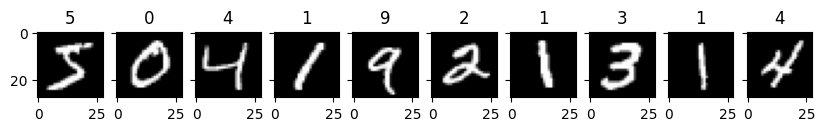

In [20]:
#plotting 10 pictures from the dataset
fig, axes = plt.subplots(ncols=10, sharex=True, sharey=True, figsize=(10, 5))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(True)
    axes[i].get_yaxis().set_visible(True)
plt.show()


In [21]:
# Normalize the pixel values of the images to the range [0, 1].
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [22]:
# reshaping the x_train and x_test  according to the required shape for cnn model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [15]:
x_test.shape

(10000,)

In [25]:
# converting y_test and y_train in to categorical form
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [26]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
# creating the cnn model
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))# adding 1st convolutional layer with 32 kernels, kernel size is 3x3 and input size is 28,28,1
model.add(Activation('relu')) # adding activation as relu for the 1st convolutional layer
model.add(MaxPooling2D(pool_size=(2,2))) # adding 1st max pooling layer with the of 2x2
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))#adding 2nd convolutional layer with 64 kernels, kernel size is 3x3 and input size is 28,28,1
                                                                   # and activation as relu
model.add(MaxPooling2D(pool_size=(2,2)))   # adding 2nd max pooling layer with the of 2x2
model.add(Conv2D(128,(3,3),input_shape=(28,28,1),activation='relu'))#adding 3rd convolutional layer with 128 kernels,kernel size is 3x3 and input size is 28,28,1
                                                                   # and activation as relu
model.add(Conv2D(256,(3,3),input_shape=(28,28,1),activation='relu'))#adding 4th convolutional layer with 256 kernels,kernel size is 3x3 and input size is 28,28,1
                                                                   # and activation as relu
model.add(Flatten()) # adding flatten layer for flattening the pictures
model.add(Dense(128,activation='relu')) # adding 1st hidden layer with 128 nuerons
model.add(Dense(50,activation='relu')) # adding 2nd hidden layer with 50 nuerons
model.add(Dense(50,activation='relu')) # adding 3rd hidden layer with 50 nuerons
model.add(Dense(10,activation='softmax')) # adding the final layers for output with 10 nuerons , and activation is set at softmax


In [34]:
# displaying the summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 1, 1, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,290,740 (4.92 MB)

 Trainable params: 430,246 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 860,494 (3.28 MB)

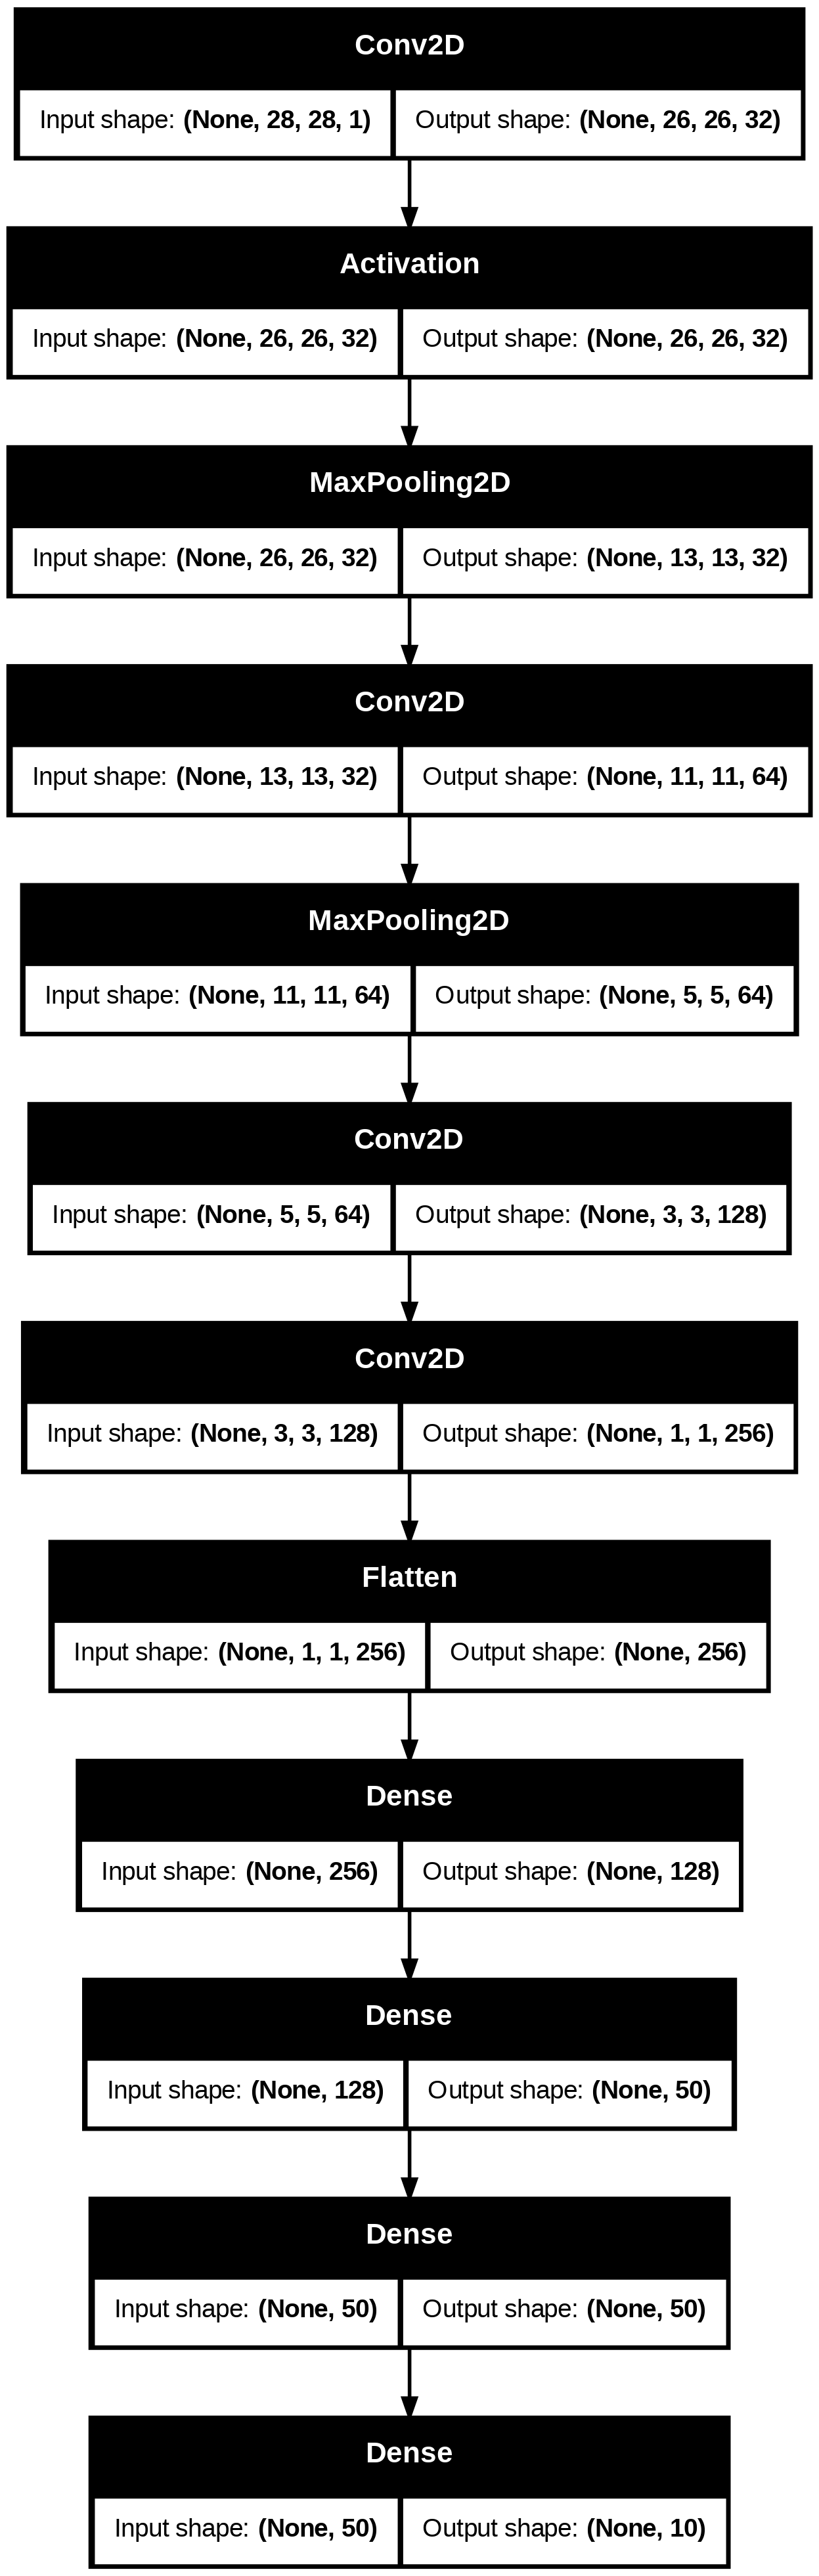

In [31]:
# displaying the flowchart of the model
tf.keras.utils.plot_model(model,to_file="model.png",show_shapes=True,expand_nested=True)

In [33]:
# compiling the model with loss set as categorical_crossentropy and optimizer set as adam
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 183ms/step - accuracy: 0.9872 - loss: 0.0438 - val_accuracy: 0.9892 - val_loss: 0.0392
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 187ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9898 - val_loss: 0.0386
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 212ms/step - accuracy: 0.9942 - loss: 0.0195 - val_accuracy: 0.9905 - val_loss: 0.0348
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 194ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9889 - val_loss: 0.0469
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 74s 197ms/step - accuracy: 0.9965 - loss: 0.0107 - val_accuracy: 0.9918 - val_loss: 0.0330
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 75s 178ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9911 - val_loss: 0.0360
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 188ms/step - accuracy: 0.9973 - loss: 0.0088 - val_accuracy: 0.9908 - val_loss: 0.0349
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 77s 174ms/step - accuracy: 0.9969 - loss: 0

In [35]:
# dumping the model in pickle / saving the model
pickle.dump(model, open('model.pkl', 'wb'))


In [36]:
# evaluting the x_test and y_test of the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9888 - loss: 0.0409


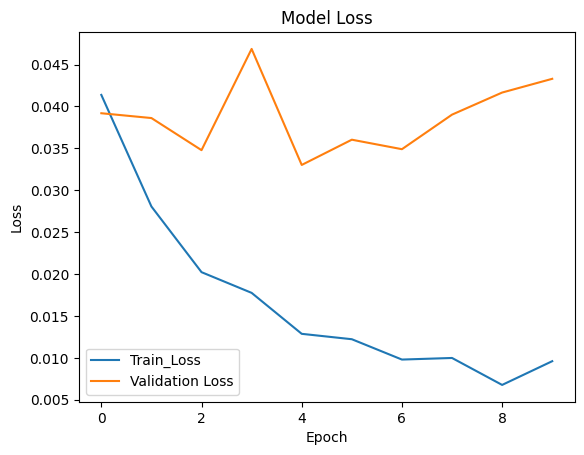

In [38]:
# plotting the loss vs validation loss
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

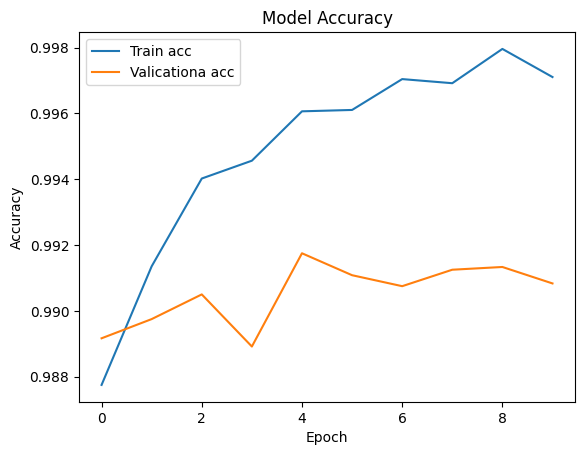

In [40]:
# plotting the accuracy vs validation accuracy
plt.plot(history.history['accuracy'],label='Train acc')
plt.plot(history.history['val_accuracy'],label='Valicationa acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [41]:
# loading our saved model
model = pickle.load(open('model.pkl', 'rb'))

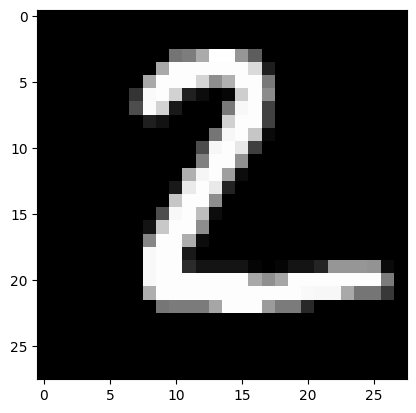

In [42]:
# displaying img at 1 index of x_test of the model
plt.imshow(x_test[1], cmap='gray')

In [43]:
#reshaping the img at 5 index of x_test and storing in variable x
x=np.reshape(x_test[5],(1,28,28,1))

In [44]:
# predicting the model at x
np.argmax(model.predict(x))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


1

In [45]:
# Predicting the labels of the model  for the  whole test set
pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [47]:
# selecting random imgs from the x_test set
num = 10
ran_indi = np.random.choice(x_test.shape[0], num, replace=False)
ran_imgs = x_test[ran_indi]
ran_lab = y_test[ran_indi]  # this is for true labels
predicted_lab = np.argmax(pred[ran_indi], axis=1)  # Predicted labels

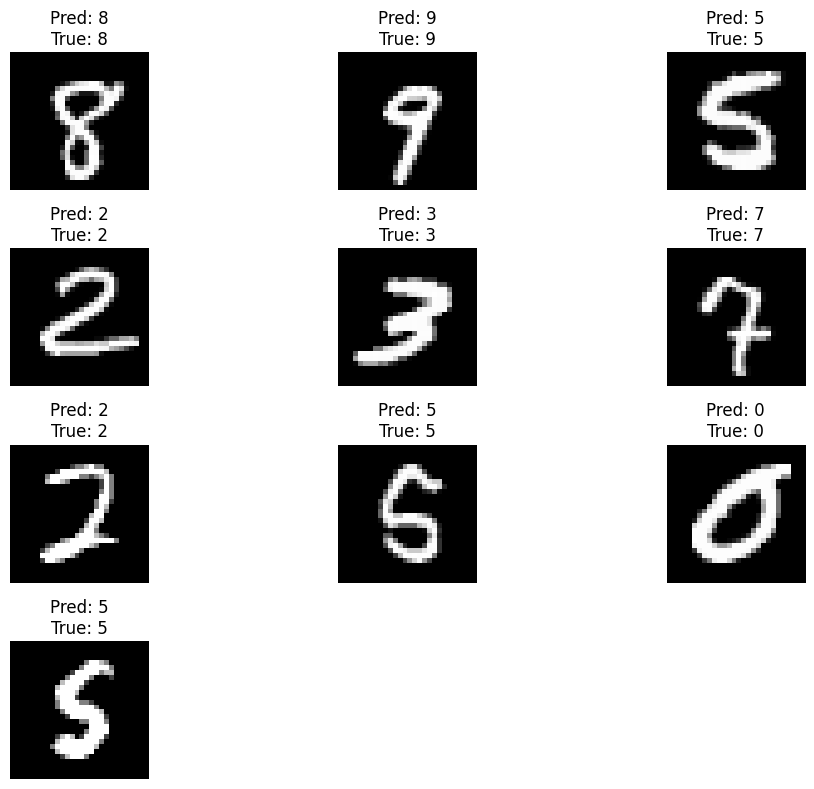

In [55]:
# Ploting random images and their predicted labels
plt.figure(figsize=(10, 8))
for i in range(num):
    plt.subplot(4, 3, i + 1)
    plt.imshow(ran_imgs[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_lab[i]}\nTrue: {np.argmax(ran_lab[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()